In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cat-in-the-dat/sample_submission.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/test.csv


In [10]:
pd.set_option('max_columns', None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split

In [11]:
df_train = pd.read_csv('../input/cat-in-the-dat/train.csv')
df_test = pd.read_csv('../input/cat-in-the-dat/test.csv')

In [12]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [13]:
X = df_train.drop(columns=['id', 'target'])
y = df_train['target']
test = df_test.drop(columns=['id'])
labels = X.columns
IDs = df_test['id']

In [24]:
print("Training set shape: {} \nTest set shape: {}".format(X.shape, test.shape))

Training set shape: (300000, 23) 
Test set shape: (300000,)


In [19]:
bin_cols = [col for col in X.columns.values if col.startswith('bin')]
num_cols = [col for col in X.columns.values if col.startswith('nom')]
ord_cols = [col for col in X.columns.values if col.startswith('ord')]

In [20]:
bin_cols

['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

In [21]:
X.nunique()

bin_0        2
bin_1        2
bin_2        2
bin_3        2
bin_4        2
nom_0        3
nom_1        6
nom_2        6
nom_3        6
nom_4        4
nom_5      222
nom_6      522
nom_7     1220
nom_8     2215
nom_9    11932
ord_0        3
ord_1        5
ord_2        6
ord_3       15
ord_4       26
ord_5      192
day          7
month       12
dtype: int64

In [22]:
# Count of the dtypes for each column in our training set
X.dtypes.value_counts()

object    17
int64      6
dtype: int64

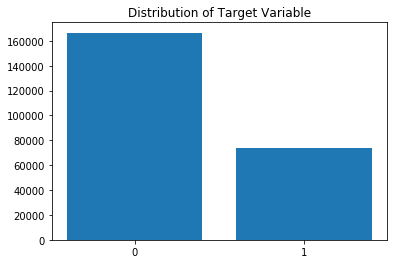

In [23]:
# Finding and plotting the count of the target variable
counts = y.value_counts()
plt.bar(counts.index, counts)
plt.gca().set_xticks([0,1])
plt.title('Distribution of Target Variable')
plt.show()
# The dataset is imbalanced

## Logistic Regression

In [ ]:
def logistic(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LogisticRegression(solver='liblinear')
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    print('Accuracy : ' , accuracy_score(y_test, pred))

## Method 1: Label Encoding

In [ ]:
# Using label encoding to convert categorical variables in the training set to numerical variables
encoder = LabelEncoder()
train = pd.DataFrame()
for col in X.columns:
    if (X[col].dtype == "object"):
        train[col] = encoder.fit_transform(X[col])
    else:
        train[col] = X[col]
train.head()

In [ ]:
# All dtypes are now int64
train.dtypes.value_counts()

In [ ]:
logistic(train, y)

## Method 2: One Hot Encoding

In [ ]:
# Using one hot encoding to convert categorical variables in the training set to numerical variables
one = OneHotEncoder(handle_unknown="ignore")
one.fit(X)
df_train = one.transform(X)
df_test = one.transform(test)

In [ ]:
# df_train is a sparse matrix, which is the default type returned with OneHotEncoding
type(df_train)

In [ ]:
# Using one hot encoding added a lot of features to our training set, as would be expected
print('train data set has {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))

In [ ]:
logistic(df_train, y)
# Accuracy of logistic regression improves with one hot encoding compared to label encoding

## Method 3: Feature hashing 

In [ ]:
X_train_hash = X.copy()
for c in X.columns:
    X_train_hash[c]=X[c].astype('str')

In [ ]:
hashing=FeatureHasher(input_type='string')
train = hashing.transform(X_train_hash.to_numpy())

In [ ]:
print("Train shape: {}".format(train.shape))

In [ ]:
logistic(train, y)
# Accuracy is better than with label encoding, but not quite as good as one hot encoding

## Predictions

In [ ]:
reg = LogisticRegression(solver = 'liblinear')
reg.fit(df_train, y)
# Fitting the final classifier using the one hot encoding dataframe
pred = reg.predict(df_test)

In [ ]:
submission = pd.DataFrame(IDs, columns=['id'])
submission['target'] = pred
submission

In [ ]:
submission.to_csv('submission.csv', index=False)